check sklearn iris dataset:
https://www.kaggle.com/uciml/iris
- X, 4 features (Sepal Length, Sepal Width, Petal Length and Petal Width)
- Y, 3 different types of irises’ (Setosa, Versicolour, and Virginica)

In [2]:
import numpy as np

In [3]:
# import dataset
from sklearn.datasets import load_iris
iris = load_iris()

In [4]:
X = iris.data
Y = iris.target
target_names = iris.target_names
feature_names = iris.feature_names

In [5]:
# split data into train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4)

In [6]:
# explore dataset size
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"Y_train: {Y_train.shape}")
print(f"Y_test: {Y_test.shape}")

X_train: (90, 4)
X_test: (60, 4)
Y_train: (90,)
Y_test: (60,)


In [7]:
# using k-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 4) # n_neighbors is a parameter that can be optimized
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [8]:
# prediction
Y_predict = knn.predict(X_test)

In [9]:
# using metrics to evaluate the prediction accuracy of this model using test dataset
from sklearn import metrics
print(metrics.accuracy_score(Y_predict, Y_test))

0.95


In [10]:
# metrics you can code like this:
accuracy = sum(np.equal(Y_predict,Y_test))/len(Y_predict)

In [11]:
print(accuracy)

0.95


In [13]:
# store the trained model in a binary file so that we can use that file for predictions. 
#Model persistance.
from sklearn.externals import joblib
joblib.dump(knn, 'mlbrain.joblib')

['mlbrain.joblib']

In [16]:
# we can now directly use the model
model = joblib.load("mlbrain.joblib")

In [19]:
model.predict(X_test)
sample = ([3,5,4,2],[2,3,5,4])
predictions = model.predict(sample)
pred_species = [target_names[p] for p in predictions]
print("predictions: ",pred_species)

predictions:  ['versicolor', 'virginica']


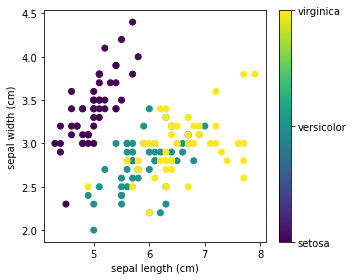

In [23]:
import matplotlib.pyplot as plt

# The indices of the features that we are plotting
x_index = 0
y_index = 1

# colorbar with the Iris target names
formatter = plt.FuncFormatter(lambda i,*args: iris.target_names[int(i)])

#chart configurations
plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.tight_layout()
plt.show()

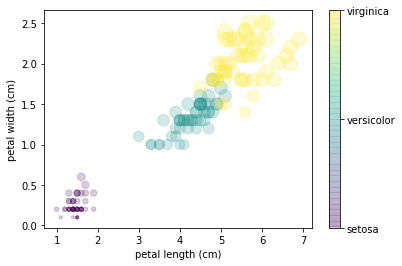

In [24]:
features = iris.data.T

plt.scatter(features[2], features[3], alpha=0.2,
            s=100*features[3], c=iris.target, cmap='viridis') #https://jakevdp.github.io/PythonDataScienceHandbook/04.02-simple-scatter-plots.html
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3]);
plt.colorbar(ticks=[0, 1, 2], format=formatter)